# Data

## Average monthly modeled sea ice cover data: 1850-2019
- Specifically: fraction of area covered by ice, ranging from 0-1.05 (the > 1 is from biases/small issues with how this is estimated, is my understanding)
- Overview: https://psl.noaa.gov/data/gridded/data.cobe2.html 
-  More metadata: https://psl.noaa.gov/thredds/dodsC/Datasets/COBE2/icec.mon.mean.nc.html

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import cartopy.crs as ccrs # for projection
import cartopy.feature as cfeature # for map features 
from cartopy.util import add_cyclic_point

# MY TURN
## Please review - you will learn Xarray fully in Week 8, but here are some more examples
## Especially useful if you will need to use Xarray to read in/work with your project data!

In [2]:
# Read the monthly ice concentration in using Xarray
# I use the open_datarray function because I know this dataset only contains one data variable (plus coordinate variables, as we would expect)
ice1 = xr.open_dataarray('icec.mon.mean.nc')

# While still an Xarray data structure, slice to only consider the Arctic Circle, from the ~40 most recent years with more robust data
ice = ice1.sel(time=slice('1980','2019'),lat=slice(90,60))  # Look! We get to used named dimension in Xarray!  Hooray!  
print(ice)

# Convert all data except time coordinate to numpy arrays so you can work with it usually your usually numpy functionality
# We can also discuss how you'd do the tasks in these lab activities in Xarray!
lat = ice['lat'].values # convert to numpy array
lon = ice['lon'].values # convert to numpy array 
time = ice['time'] # keeping time as date-time object for us in plotting 
ice = ice.values # convert to numpy array - the actual ice cover data

<xarray.DataArray 'icec' (time: 480, lat: 30, lon: 360)> Size: 21MB
[5184000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 120B 89.5 88.5 87.5 86.5 85.5 ... 63.5 62.5 61.5 60.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 4kB 1980-01-01 1980-02-01 ... 2019-12-01
Attributes:
    long_name:     Monthly Means of Global Ice Concentration
    valid_range:   [0. 1.]
    units:         fr
    var_desc:      Ice Concentration
    dataset:       COBE-SST2 Sea Surface Temperature
    statistic:     Mean
    parent_stat:   Individual obs
    actual_range:  [0.   1.05]
    level_desc:    Surface


# YOUR TURN
## (a) What are the three dimensions of the ice concentration data, and what order are they in?
## (b) What is the order of the latitude coordinates?
## (c) What is the order of the longitude coordinates, and the type of longitude system they are in?

In [ ]:
# (a) 
print(np.shape(ice))
# time, lat, lon

# (b)
print(lat)
print(np.shape(lat))
# north to south

# (c)
print(lon)
print(np.shape(lon))
# west to east

(480, 30, 360)
[89.5 88.5 87.5 86.5 85.5 84.5 83.5 82.5 81.5 80.5 79.5 78.5 77.5 76.5
 75.5 74.5 73.5 72.5 71.5 70.5 69.5 68.5 67.5 66.5 65.5 64.5 63.5 62.5
 61.5 60.5]
(30,)
[  0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5  11.5
  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5  22.5  23.5
  24.5  25.5  26.5  27.5  28.5  29.5  30.5  31.5  32.5  33.5  34.5  35.5
  36.5  37.5  38.5  39.5  40.5  41.5  42.5  43.5  44.5  45.5  46.5  47.5
  48.5  49.5  50.5  51.5  52.5  53.5  54.5  55.5  56.5  57.5  58.5  59.5
  60.5  61.5  62.5  63.5  64.5  65.5  66.5  67.5  68.5  69.5  70.5  71.5
  72.5  73.5  74.5  75.5  76.5  77.5  78.5  79.5  80.5  81.5  82.5  83.5
  84.5  85.5  86.5  87.5  88.5  89.5  90.5  91.5  92.5  93.5  94.5  95.5
  96.5  97.5  98.5  99.5 100.5 101.5 102.5 103.5 104.5 105.5 106.5 107.5
 108.5 109.5 110.5 111.5 112.5 113.5 114.5 115.5 116.5 117.5 118.5 119.5
 120.5 121.5 122.5 123.5 124.5 125.5 126.5 127.5 128.5 129.5 130.5 131.5
 132.5 133.5 134.5 135

# ******************************************************************* 
# LET'S ANALYZE SEA ICE CONCENTRATION FOR ONE GRIDPOINT
## (a) Pull out the time series of ice concentration data, for the 89.5 N, 359.5 E gridpoint
## (b) Then find the date at which minimum value of sea ice concentration is reached, for this location

# YOUR TURN

In [5]:
# (a) Pull out the time series of ice concentration data, for the 89.5 N, 359.5 E gridpoint
time_series = ice[:,0,-1]
print(time_series)

# Xarray soon - more straightforward
# But please do it using Numpy indexing, using the Numpy arrays
# Start with original dataset

#time_series_xarray = ice1.sel(lat=89.5, lon = 359.5, method ='nearest').sel(time=slice('1980','2019'))

[1.         1.         1.         1.         1.         1.
 1.         0.99000007 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.99000007 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.99000007 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.99000007 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.99000007 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.99000007 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.99000007 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.99000007 1.         1.         1.         1.
 1.         1.         1.         1.         1.         

# MY TURN

Text(0.5, 1.0, 'Monthly Ice Fraction at 89.5°N, 359.5°E (1980–2019)')

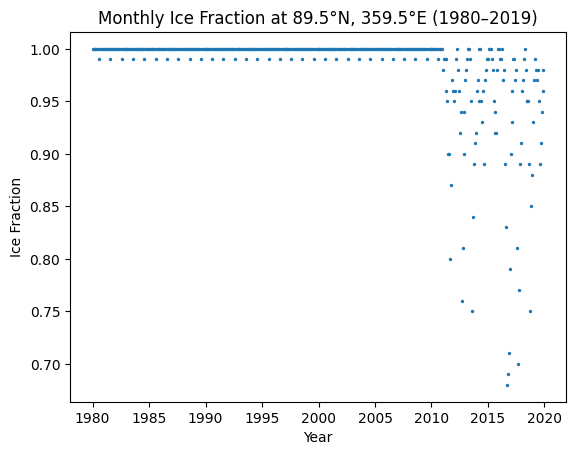

In [6]:
# Time series plotting time!
fig,ax = plt.subplots()
ax.scatter(time,time_series,s=2)
ax.set_xlabel('Year')
ax.set_ylabel('Ice Fraction')
ax.set_title('Monthly Ice Fraction at 89.5°N, 359.5°E (1980–2019)')

# YOUR TURN

In [9]:
# (b) Then find the date at which minimum value of sea ice concentration is reached, for THIS LOCATION 
min_index = np.argmin(time_series)
print(min_index)

time_min_ice = time.isel(time=min_index)
print(time_min_ice)

440
<xarray.DataArray 'time' ()> Size: 8B
array('2016-09-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2016-09-01
Attributes:
    long_name:           Time
    delta_t:             0000-01-00 00:00:00
    avg_period:          0000-01-00 00:00:00
    prev_avg_period:     0000-00-01 00:00:00
    standard_name:       time
    axis:                T
    coordinate_defines:  start
    actual_range:        [-14975.  47085.]


# ******************************************************************* 
# COMPARISON OPERATIONS TIME!

## (a.) For all data (not just at the grid point above), how many locations have no ice, at each time?
## (b.) How many locations have greater than 90% of ice, at each time?

# YOUR TURN

In [10]:
print(ice)

[[[1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.      

In [21]:
# (a) How many locations have no ice at each time?
no_ice = np.sum(ice == 0, axis=(1,2))
print(no_ice)


# (b)
# How many locations have greater than 90% ice at each time
lots_ice = np.sum(ice > .9, axis=(1,2))
print(lots_ice)


[ 672  614  609  628  724  854 1075 1476 1711 1334  977  743  648  620
  577  609  633  768 1052 1506 1758 1390 1021  735  615  575  562  573
  668  804 1050 1410 1704 1300 1008  796  707  644  630  630  764  885
 1150 1451 1777 1350 1007  807  762  761  707  681  760  878  968 1269
 1710 1495 1045  896  730  663  628  594  697  824 1133 1599 1886 1394
 1028  768  671  599  591  586  659  862 1087 1450 1694 1324 1052  823
  648  570  571  600  701  828 1105 1618 1779 1356 1044  727  692  645
  631  612  707  888 1171 1568 1744 1378  988  747  665  635  635  663
  847  918 1163 1536 1804 1366 1068  800  720  706  665  681  806  931
 1273 1787 2029 1418 1069  851  791  734  706  697  796  947 1208 1681
 1986 1427 1070  863  764  682  700  679  823  945 1188 1550 1746 1369
 1084  851  753  686  674  694  773  932 1199 1577 1887 1345 1075  861
  797  740  723  772  795  926 1215 1588 1865 1333 1040  897  829  804
  769  783  834  997 1213 1807 2153 1417 1095  845  770  711  718  686
  751 

# MY TURN ( & YOUR INTERPRETATION)
## What do you notice in these plots?

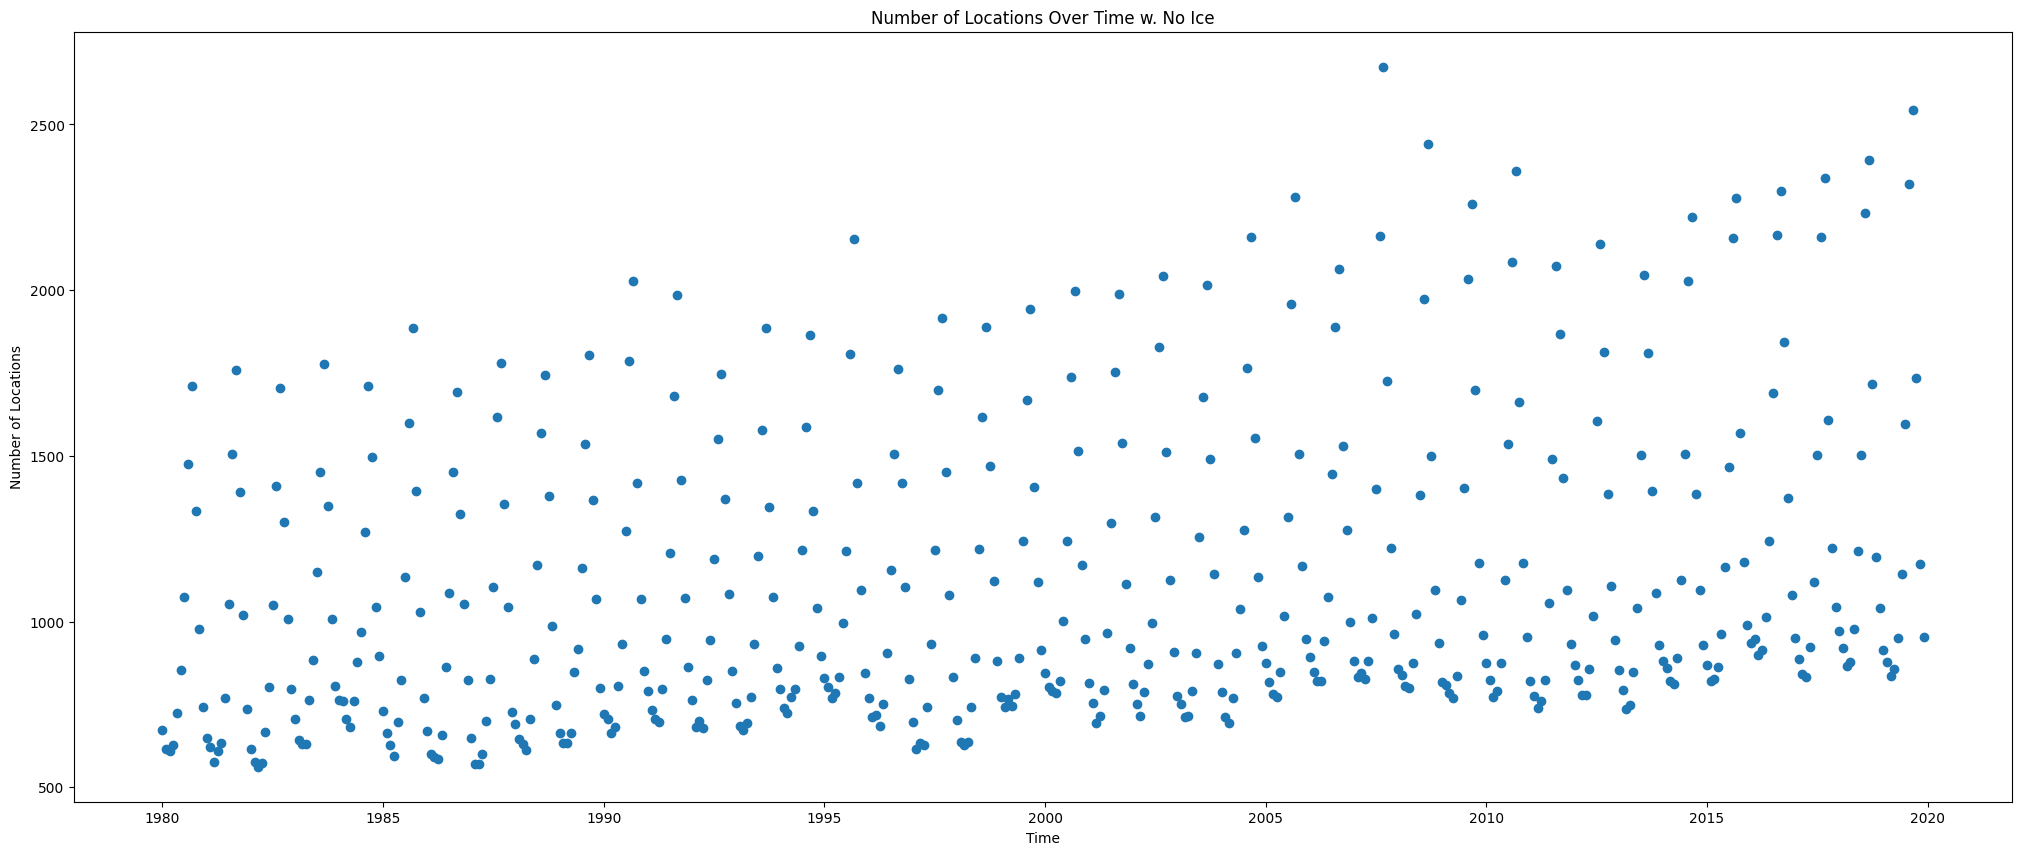

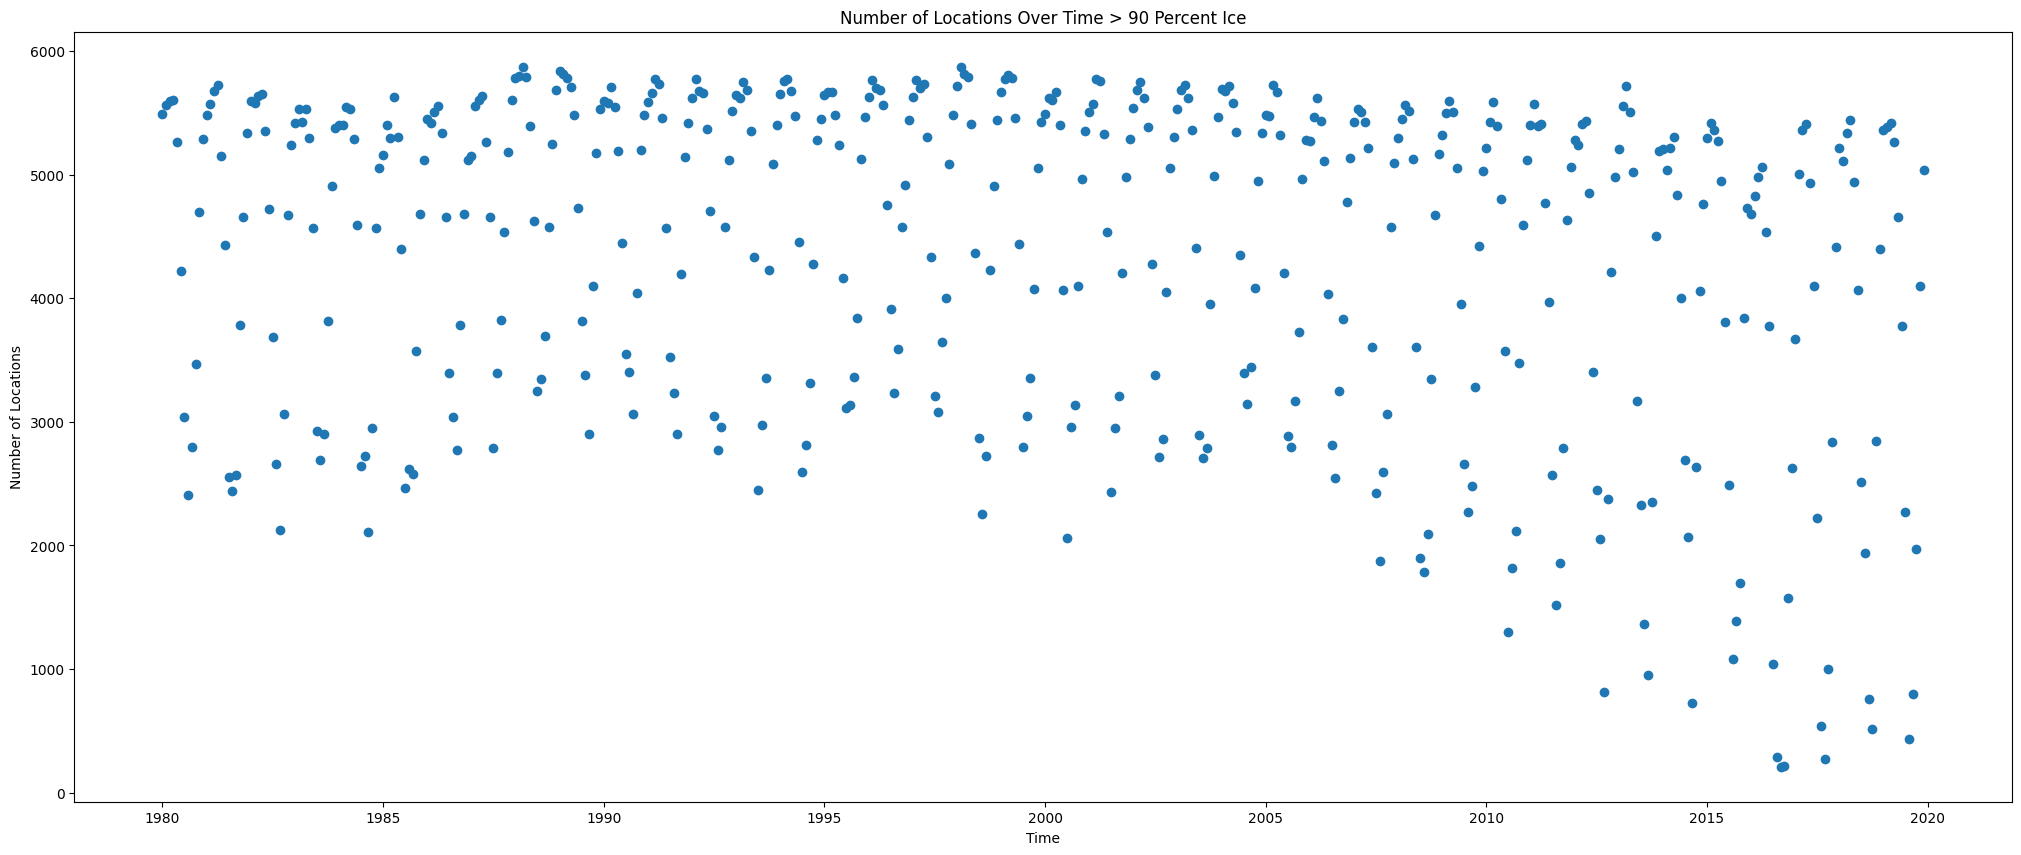

In [22]:
fig, ax = plt.subplots(figsize=(25,10))
ax.scatter(time,no_ice)
ax.set_xlabel('Time')
ax.set_ylabel('Number of Locations')
ax.set_title('Number of Locations Over Time w. No Ice')
plt.show()

fig, ax = plt.subplots(figsize=(25,10))
ax.scatter(time,lots_ice)
ax.set_xlabel('Time')
ax.set_ylabel('Number of Locations')
ax.set_title('Number of Locations Over Time > 90 Percent Ice')
plt.show()

# ******************************************************************* 
# Let's evaluate ice in September and March
## These are the two months in the Arctic that typically have the least and most ice, respectively
## (a.) Average sept_ice data over all locations 
## (b.)  Average mar_ice data over all locations 

# MY TURN

In [23]:
# Go back to Xarray, pull out September months only
# Why?  September is month when ice tends to be at minimum in its coverage

ice1 = ice1.sel(time=slice('1980','2019'),lat=slice(90,60))  
sept_ice = ice1.sel(time=ice1.time.dt.month == 9)

# New time array, just the Septembers
sept_time = sept_ice['time']
sept_ice = sept_ice.values
np.shape(sept_ice)

(40, 30, 360)

# YOUR TURN

In [26]:
# (a) Average sept_ice data over all locations 
sept_mean = np.nanmean(sept_ice, axis=(1,2))
print(sept_mean)

# Sanity check:  
# [0.6054512  0.58649653 0.58094627 0.5876718  0.5579548  0.5668642
# 0.5990594  0.6208161  0.6106719  0.58013296 0.55496466 0.5548261
# 0.60278076 0.57249224 0.5919138  0.5551839  0.61402255 0.58404803
# 0.55700284 0.5516181  0.5542489  0.56327444 0.53744835 0.5438048
# 0.5541895  0.5260155  0.5420169  0.4483013  0.4610439  0.49499437
# 0.4649689  0.46296182 0.39441442 0.45509622 0.44921502 0.45128998
# 0.37245968 0.40507212 0.42344978 0.42549226]

[0.6054512  0.58649653 0.58094627 0.5876718  0.5579548  0.5668642
 0.5990594  0.6208161  0.6106719  0.58013296 0.55496466 0.5548261
 0.60278076 0.57249224 0.5919138  0.5551839  0.61402255 0.58404803
 0.55700284 0.5516181  0.5542489  0.56327444 0.53744835 0.5438048
 0.5541895  0.5260155  0.5420169  0.4483013  0.4610439  0.49499437
 0.4649689  0.46296182 0.39441442 0.45509622 0.44921502 0.45128998
 0.37245968 0.40507212 0.42344978 0.42549226]


# MY TURN (& YOUR INTERPRETATION)
## What do you notice in this plot?

Text(0.5, 1.0, 'Average September Ice Fractions, 1980-2019: Arctic Circle')

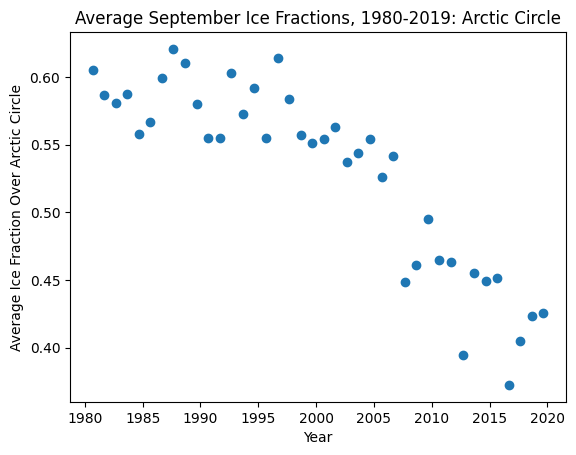

In [27]:
# Plot time
fig, ax = plt.subplots()
ax.scatter(sept_time, sept_mean)
ax.set_xlabel('Year')
ax.set_ylabel('Average Ice Fraction Over Arctic Circle')
ax.set_title('Average September Ice Fractions, 1980-2019: Arctic Circle')

# MY TURN

In [28]:
# Go back to Xarray, pull out March months only
# Why?  March is month when ice tends to be at minimum in its coverage

ice1 = ice1.sel(time=slice('1980','2019'),lat=slice(90,60))  
mar_ice = ice1.sel(time=ice1.time.dt.month == 3)

# New time array, just the Marches
mar_time = mar_ice['time']
mar_ice = mar_ice.values
np.shape(mar_ice)


(40, 30, 360)

# YOUR TURN

In [29]:
# (b.)  Average mar_ice data over all locations 
mar_mean = np.nanmean(mar_ice, axis=(1,2))
print(mar_mean)

# Sanity check:  
# [0.838348   0.8436111  0.8468572  0.82934225 0.83046675 0.8244894
#  0.8333126  0.8427949  0.85129    0.8429024  0.8347072  0.8415148
# 0.83144414 0.83766615 0.8389915  0.8281654  0.83506924 0.83916557
# 0.8485418  0.8392815  0.8259477  0.84456295 0.8381414  0.836686
# 0.83797884 0.83200854 0.822925   0.8113537  0.8215248  0.8259887
# 0.82747805 0.82106227 0.81404245 0.83547807 0.80572283 0.8188996
# 0.7923197  0.80532956 0.8068218  0.8185021 ]

[0.838348   0.8436111  0.8468572  0.82934225 0.83046675 0.8244894
 0.8333126  0.8427949  0.85129    0.8429024  0.8347072  0.8415148
 0.83144414 0.83766615 0.8389915  0.8281654  0.83506924 0.83916557
 0.8485418  0.8392815  0.8259477  0.84456295 0.8381414  0.836686
 0.83797884 0.83200854 0.822925   0.8113537  0.8215248  0.8259887
 0.82747805 0.82106227 0.81404245 0.83547807 0.80572283 0.8188996
 0.7923197  0.80532956 0.8068218  0.8185021 ]


# MY TURN (& YOUR INTERPRETATION)
## What do you notice in this plot?

Text(0.5, 1.0, 'Average March Ice Fractions, 1980-2019: Arctic Circle')

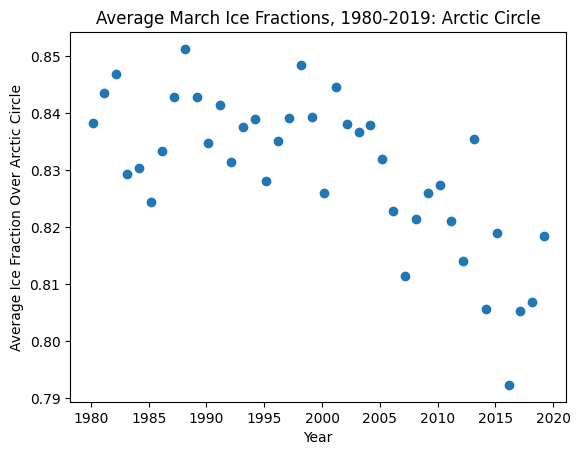

In [30]:
fig, ax = plt.subplots()
ax.scatter(mar_time, mar_mean)
ax.set_xlabel('Year')
ax.set_ylabel('Average Ice Fraction Over Arctic Circle')
ax.set_title('Average March Ice Fractions, 1980-2019: Arctic Circle')

# ******************************************************************* 
# Finally, let's explore some climatology - let's make maps
## (a.) Average sept_ice_data over all times, at each location  (so, average sea ice concentration just for Septembers over all times, at each location)
## (b.) Average mar_ice_data over all times, at each location (so, average sea ice concentration just for Marchs over all times, at each location)

# YOUR TURN

In [31]:
# (a) and (b)
sept_time_mean = np.nanmean(sept_ice, axis=0)
mar_time_mean = np.nanmean(mar_ice, axis=0)

/tmp/ipykernel_1026997/123597840.py:2: RuntimeWarning: Mean of empty slice
  sept_time_mean = np.nanmean(sept_ice, axis=0)
/tmp/ipykernel_1026997/123597840.py:3: RuntimeWarning: Mean of empty slice
  mar_time_mean = np.nanmean(mar_ice, axis=0)


# MY TURN & YOUR INTERPRETATION
## What do you notice?

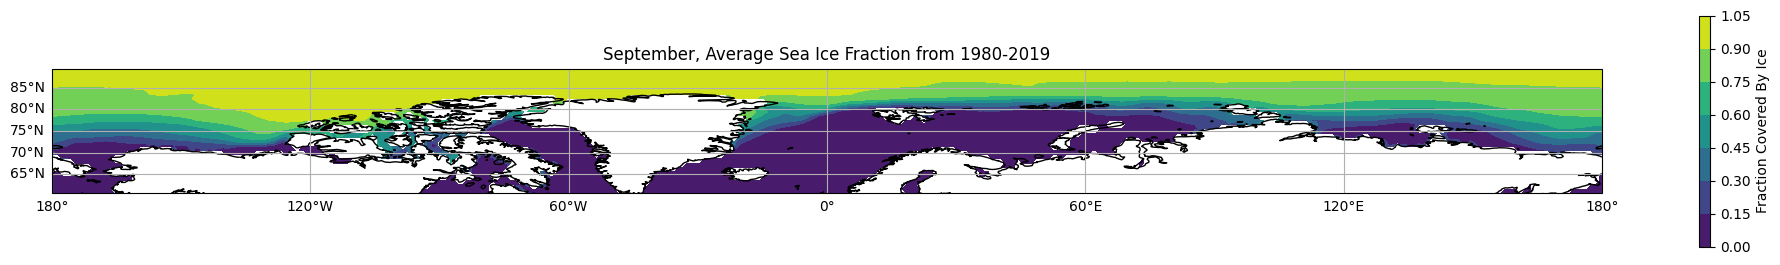

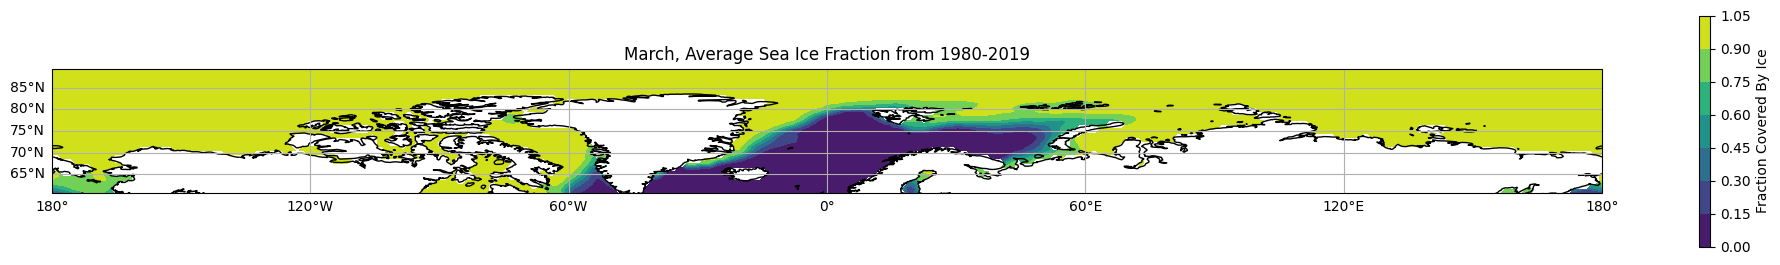

In [32]:
# I MAKE YOU MAPS

# September

proj = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(25,5),subplot_kw=dict(projection=proj))

sept_time_mean2, lon2 = add_cyclic_point(sept_time_mean, coord=lon)

X,Y = np.meshgrid(lon2,lat)

cs = ax.contourf(X,Y,sept_time_mean2)
cb = plt.colorbar(cs, shrink=0.6, ax=ax)
cb.set_label('Fraction Covered By Ice')
            
# Some options involving the gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.coastlines()
ax.set_title('September, Average Sea Ice Fraction from 1980-2019')
plt.show()


# March

proj = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(25,5),subplot_kw=dict(projection=proj))

mar_time_mean2, lon2 = add_cyclic_point(mar_time_mean, coord=lon)

X,Y = np.meshgrid(lon2,lat)

cs = ax.contourf(X,Y,mar_time_mean2)
cb = plt.colorbar(cs, shrink=0.6, ax=ax)
cb.set_label('Fraction Covered By Ice')
            
# Some options involving the gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

ax.coastlines()
ax.set_title('March, Average Sea Ice Fraction from 1980-2019')
plt.show()